<a href="https://colab.research.google.com/github/ousdiallo/Projet-ML/blob/main/Projet_Machine_Learnig.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projet Machine Learning

## Importation des librairies

In [ ]:
# Data Manipulation
import numpy as np
import pandas as pd


# Import Dependencies
%matplotlib inline

# Start Python Imports
import math, time, random, datetime

# Visualization 
import matplotlib.pyplot as plt
import missingno
import seaborn as sns
plt.style.use('seaborn-whitegrid')

# Machine Learning
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score, mean_absolute_error

## Chargement des données

In [ ]:
df = pd.read_csv('Boston_Data.csv')

In [ ]:
df.head()

,Unnamed: 0,R1,R2,R3,R4,R5,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,Y
0,0,-0.21,0.11,-0.65,-0.54,1.48,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,1,0.08,-0.61,-0.85,-0.36,-0.12,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,2,-1.32,0.95,-0.75,-0.99,-0.36,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,3,0.23,-0.10,-0.43,1.58,0.00,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,4,-1.67,1.49,0.41,0.63,-0.87,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


# Dictionnaire de Données

*   CRIM - per capita crime rate by town
*   ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
*   INDUS - proportion of non-retail business acres per town.
*   CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
*   NOX - nitric oxides concentration (parts per 10 million)
*   RM - average number of rooms per dwelling
*   AGE - proportion of owner-occupied units built prior to 1940
*   DIS - weighted distances to five Boston employment centres
*   RAD - index of accessibility to radial highways
*   TAX - full-value property-tax rate per $10,000
*   PTRATIO - pupil-teacher ratio by town
*   B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
*   LSTAT - % lower status of the population
*   MEDV - Median value of owner-occupied homes in $1000's


# Analyse Exploratoire des Données

In [ ]:
# Netoyage des colonnes
df = df.drop("Unnamed: 0", axis=1)

In [ ]:
df.head()

,R1,R2,R3,R4,R5,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,Y
0,-0.21,0.11,-0.65,-0.54,1.48,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.08,-0.61,-0.85,-0.36,-0.12,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,-1.32,0.95,-0.75,-0.99,-0.36,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.23,-0.10,-0.43,1.58,0.00,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,-1.67,1.49,0.41,0.63,-0.87,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


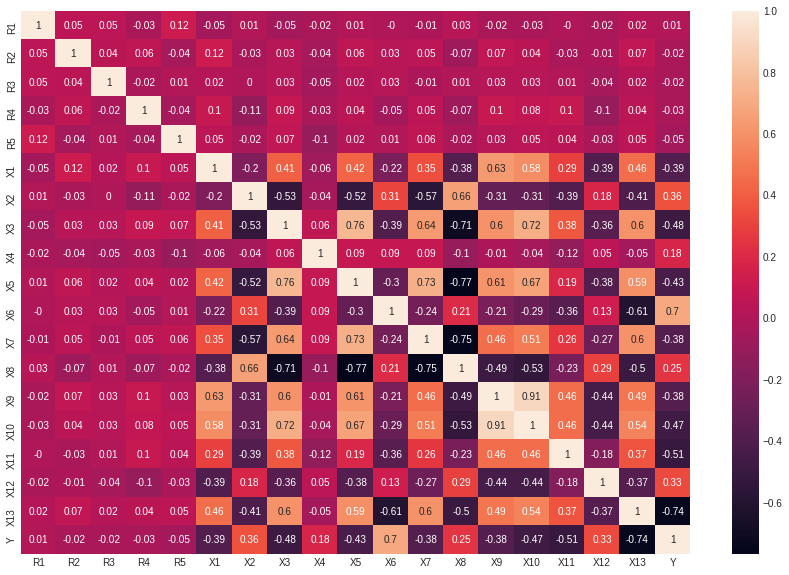

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))  
correlation_matrix = df.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

In [ ]:
df.isnull().sum()

R1     0
R2     0
R3     0
R4     0
R5     0
X1     0
X2     0
X3     0
X4     0
X5     0
X6     0
X7     0
X8     0
X9     0
X10    0
X11    0
X12    0
X13    0
Y      0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


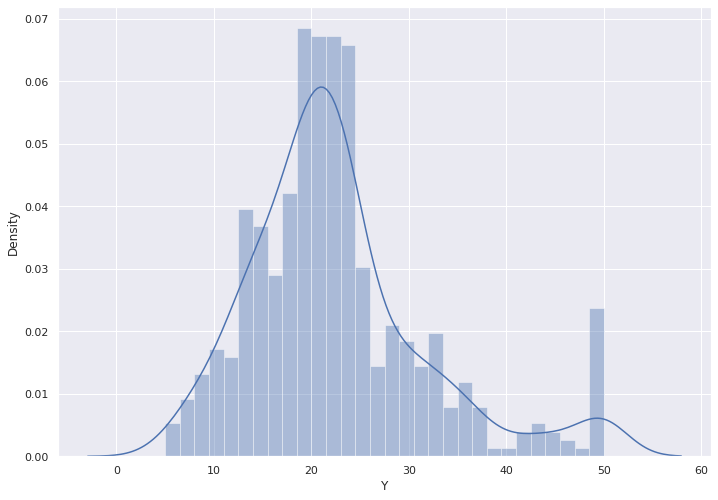

In [ ]:
## Verification de la normalité de la variable de reponse
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(df["Y"], bins=30)
plt.show()

# Création du modèle I: Modèle Lineaire

# Prediction modèle I

In [ ]:
# Création d'une base d'apprentissage et d'une base test X_train, Y_train
## dataframe des variables explicatives
df_x=pd.DataFrame(np.c_[df.drop("Y", axis=1)], columns = ["R1", "R2", "R3", "R4", "R5", "X1", "X2", "X3", "X4", "X5", "X6", "X7", "X8", "X9", "X10", "X11", "X12", "X13"])
## dataframe de la variable dependante
df_y= pd.DataFrame(df["Y"])
##67% des données seront considérés pour  l'apprentissage et 33%  pour te test du modele
#NOTE: Le meme pourcentage est appliqué aussi bien pour les donnees explicatives que dependantes
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.33, random_state=42)

In [ ]:
## Taille de chaque sous base
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(339, 18)
(167, 18)
(339, 1)
(167, 1)


In [ ]:
## Normalisation des données
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_sc = scaler.fit_transform(x_train)
x_test_sc = scaler.transform(x_test)

In [ ]:
# Entrainement du model: Modèle sur données d'entrainement
model_reg = linear_model.LinearRegression()
model_reg.fit(x_train_sc, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# Coefficient de regression de chaque variables explicative dans le modèle d'entrainementl
print(model_reg.coef_)

[[ 0.240292   -0.37622487 -0.0347391   0.38608081 -0.34674701 -0.88951117
   0.95396581  0.47456046  0.80464527 -1.9301345   2.91877375 -0.35075635
  -3.05308121  1.93240625 -1.30744898 -2.1235289   1.09142992 -3.79635637]]


In [ ]:
print(param_model_reg)

NameError: ignored

In [ ]:
# Prédictions du prix du loyé sur nos données test sur la base des coefficients de regression du modèle d'entrainement
y_preds = model_reg.predict(x_test_sc)
print(y_preds)

# Evaluation Modèle I

In [ ]:
## Evaluation du modèle d'apprentissage
y_train_predict = model_reg.predict(x_train_sc)
rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))
r2 = r2_score(y_train, y_train_predict)
MAE = mean_absolute_error(y_train, y_train_predict)

print("La performance du modèle sur la base d'apprentissage ")
print("--------------------------------------")
print("L'erreur quadratique moyenne est {}".format(rmse))
print('le score R2 est {}'.format(r2))
print('le score MAE est {}'.format(MAE))
print("\n")

# model evaluation for testing set
y_test_predict = model_reg.predict(x_test_sc)
rmse = (np.sqrt(mean_squared_error(y_test, y_test_predict)))
r2 = r2_score(y_test, y_test_predict)
MAE = mean_absolute_error(y_test, y_test_predict)

print("La performance du modèle sur la base de test")
print("--------------------------------------")
print("L'erreur quadratique moyenne est {}".format(rmse))
print('le score R2 est {}'.format(r2))
print('le score MAE est {}'.format(MAE))

La performance du modèle sur la base d'apprentissage 
--------------------------------------
L'erreur quadratique moyenne est 4.754307756687709
le score R2 est 0.7435633988013106
le score MAE est 3.3449606513275194


La performance du modèle sur la base de test
--------------------------------------
L'erreur quadratique moyenne est 4.618550053915842
le score R2 est 0.7181365613664253
le score MAE est 3.22675528292064


In [ ]:
plt.scatter(y_test, y_test_predict)
plt.show()